In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio as rio
import rioxarray as rxr

In [2]:
# read in aspect and slope after imported in import_dem
aspect = rxr.open_rasterio('aspect_rainier_py3dep.tif',masked=True)
slope = rxr.open_rasterio('slope_rainier_py3dep.tif',masked=True)

Text(0.5, 1.0, 'Diurnal Anisotropic Heating Index (DAH) vs. Aspect and Slope \n (figure adapted from Crista et al. 2017)')

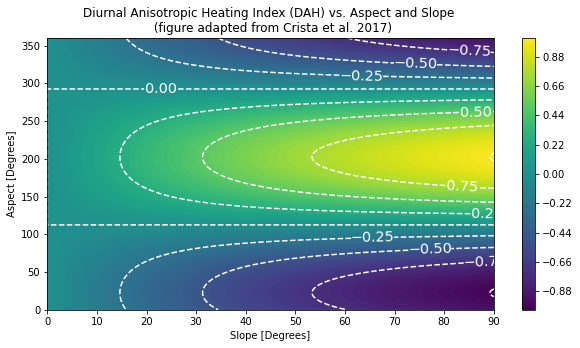

In [3]:
# Diurnal Anisotropic Heating Index [Böhner and Antonić, 2009]
# DAH = cos(alpha_max-alpha)*arctan(beta) where alpha_max is slope aspect 
# recieving maximum heating alpha is slope aspect, beta is slope aspect
# in radians. adpated from: https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2017WR020799
alpha_max = 202.5
potential_aspects = np.linspace(0,360,1000)
potential_slopes = np.linspace(0,90,1000)
a1,a2 = np.meshgrid(potential_aspects,potential_slopes)
DAH = np.cos(np.deg2rad(alpha_max-a1))*np.arctan(np.deg2rad(a2))
f,ax = plt.subplots(figsize=(10,5))
h = ax.contourf(a2,a1,DAH,levels=100)
c = ax.contour(a2,a1,DAH,levels=[-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1],colors='white',linestyles='dashed')
ax.clabel(c,fontsize='x-large')
ax.set_xlabel('Slope [Degrees]')
ax.set_ylabel('Aspect [Degrees]')
f.colorbar(h)
ax.set_title('Diurnal Anisotropic Heating Index (DAH) vs. Aspect and Slope \n (figure adapted from Crista et al. 2017)')

In [4]:
# DAH calculation
DAH = np.cos(np.deg2rad(alpha_max-aspect))*np.arctan(np.deg2rad(slope))
DAH = DAH.rio.reproject('EPSG:32610', resampling=rio.enums.Resampling.nearest)

Text(0.5, 1.0, 'Diurnal Anisotropic Heating (DAH) Index \n')

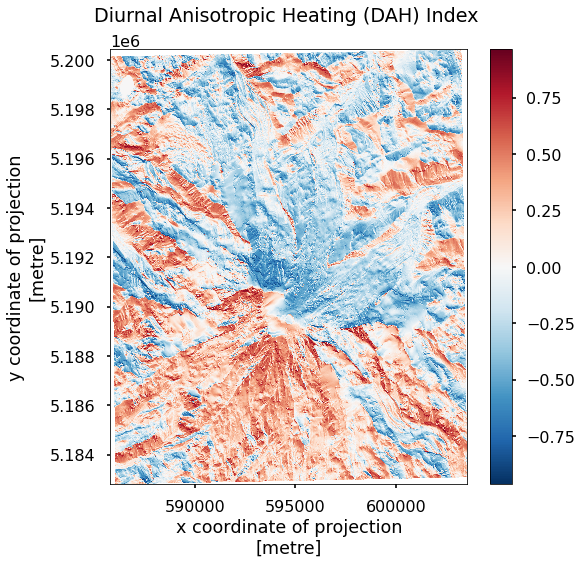

In [8]:
f,ax=plt.subplots(figsize=(8,8))
plt.style.use('seaborn-poster')
DAH.plot(ax=ax)
ax.set_title('Diurnal Anisotropic Heating (DAH) Index \n')

In [6]:
DAH.rio.to_raster('diurnal_anisotropic_heating_index_rainier.tif')

/mnt/working/egagli/sw/miniconda3/envs/aws-rtc-stac2/lib/python3.8/site-packages/rioxarray/raster_writer.py:108: UserWarning: The nodata value (3.402823466e+38) has been automatically changed to (3.4028234663852886e+38) to match the dtype of the data.
  warnings.warn(
